           Observation
0  2014-07-08T01:05:23
1  2014-07-08T01:13:12
2  2014-07-08T01:21:01
3  2014-07-08T01:28:49
4  2014-07-08T01:36:38
[ 56846.04540509  56846.05083333  56846.05626157  56846.06167824
  56846.06710648  56846.07253472  56846.07796296  56846.08337963
  56846.08880787  56846.09422454  56846.09965278  56846.10508102
  56846.11049769  56846.11592593  56846.12135417  56846.12677083
  56846.13219907  56846.13762731  56846.14313657  56846.14857639
  56846.15407407  56846.15961806  56846.19981481  56846.20524306
  56846.2106713   56846.21608796  56846.2215162   56846.22693287
  56846.23236111  56846.23777778  56846.24320602  56846.24862269
  56846.25405093  56846.25946759  56846.26489583  56846.2703125
  56846.27574074  56846.28115741  56846.28658565  56846.29200231
  56846.29743056  56846.30362269  56846.30905093  56846.31446759
  56846.31989583  56846.32532407  56846.33074074  56846.33616898
  56846.34158565  56846.34701389  56846.35243056  56846.35784722
  56846.3625    ]


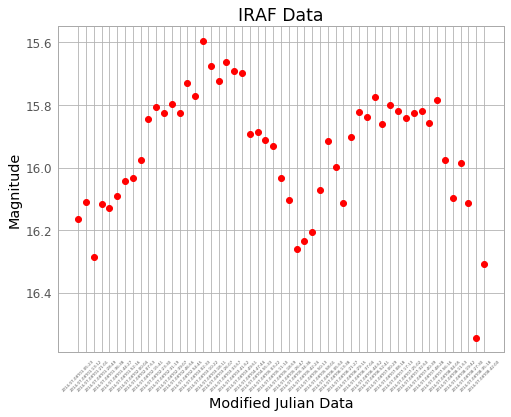

In [25]:

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)



#read photometry
photo = pd.read_csv ('rmaster_phot_v2.dat', sep='\s+', header=None, names = ['ID','mag','error','fits'])

#read time
obs = pd.read_csv ('dateobs.txt', header=None, names = ['Observation'])
print(obs.head())
from astropy.time import Time
time = obs['Observation']

#make dummy array
dummy = np.zeros(len(time))
for jj in range(len(time)):
    t = Time(time[jj], format='isot', scale='utc')
    dummy[jj]=t.mjd    
    
print(dummy)

#make array of 0's
stararr = np.zeros(shape=(30,len(dummy)))
print(stararr)

#make array of light curves
for jj in range(len(photo)):
    starid = (photo['ID'].iloc[jj])%30
    colno = np.floor(float(jj)/30)
    stararr[int(starid),int(colno)] = photo['mag'].iloc[jj]
    
print("Star 1 has this light curve:\n",stararr[1])
    
#plot magnitude of variable star relataive to nonvariable stars as a function time
plt.plot(time, stararr[1], 'ro')
plt.xlabel('Modified Julian Data')
plt.ylabel('Magnitude')
plt.gca().invert_yaxis()
plt.title('IRAF Data')
plt.xticks(range(0,len(time)),time,size=4,rotation=45)
plt.show()


    